#Real Estate -Prize Predictor

In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv("data.csv")

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     507 non-null    object 
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.6+ KB


In [ ]:
housing['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e9a952c10>,
      dtype=object)

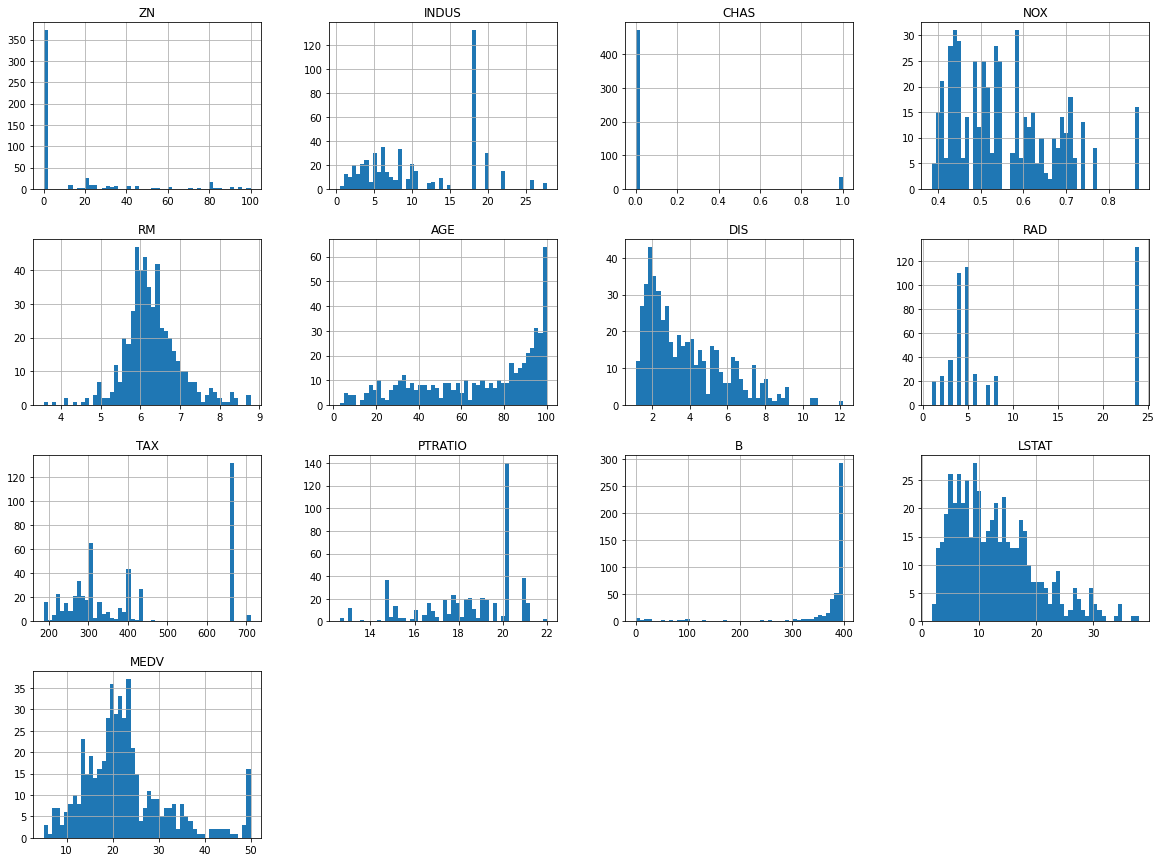

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize =(20,15))

  ##TRAIN-TEST SPLITTING


In [ ]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    train_set = []
    test_set = []
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)

[282 430  47   6 426 102 191 375 133 336 216  80  64 276 387 412 504  91
 393 176 463 427 457 467 224 125 253 177 118 380 156 319   8 271  49 192
 103 207  89 229 246  85 108 183 270 325 287 316 100 288 167 190 119 449
 332 193 491 379 275 205 172 179  48 357 310 371 433 260 353 324 138  21
 401 472  51 220 498 225 297  81 283 390 425 158 475 148  75 311  37 101
 285 483 391 321 341 280  31 331  30  52 468 306 395 361  56 485 370  63
 290 350 413 262 210 466 104 200 459 116 237  20 406 124 213  97 354 304
 344 438  26 419 461 165 495 215 228 349 195 477 187 377 429 326 221 128
 373 446  17 238 114 452  55 226 139 447   3  67 294   4 497 317 376 268
 204  65 278 386 263 208 355 347  35 256 151 243  87   5 492 242 123  60
 186 251 363 126 366 365 162  88 107 105 464  84 334 323 231 244 250 398
 178  96 112 240 414 360  14 269 346 409 378 223 309  68 369 454 149  98
 420 106  57 117 339 188 293 328 239 122 140 137 120 431 255 219 202 493
 478 135 194  44 286  61 153 279 505 500 403 394 45

In [ ]:
print (f"rows in train set :{len(train_set)}\nRows in test set : {len(test_set)}\n ")

rows in train set :406
Rows in test set : 101
 
